<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/CNN/01_workshop_convolucionales_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import (
    Dense, Dropout, Flatten, Conv2D, MaxPooling2D
)
from keras.utils import to_categorical

In [2]:
def optimization_learning_curves(
    history:dict,
    metrica:str,
    title:str='',
    X_size:int=8,
    y_size:int=4,
    font_size:int=15,
    X_label:str='Epoch',
    y_label:str='Loss'
)->None:
  """ Grafica curvas de aprendizaje """
  fig, ax = plt.subplots(figsize=(X_size, y_size))
  fig.suptitle(title, fontsize=font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(X_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper right', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()

# **Data**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [9]:
X_test.shape

(10000, 28, 28, 1)

# **Normalization**

- Se toma como referente 255, ya que es el número de pixel normalmente. Donde cero es negro y 255 es blanco.

In [11]:
X_train = X_train/255
X_test = X_test/255

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
num_clases = y_test.shape[1]
num_clases

10

Arquitectura

1. Primera capa oculta: capa convolucional Conv2D

  - Tiene 32 mapas de caracteristicas, con un tamaño de $5*5$ y una función de activación ReLu
Capa Pooling MaxPooling2D

2. Tamaño de pacht de $2 * 2$
  -Capa de regularización Dropout
3. Capa Flatten para conversión de la matriz2D en un vector
4. Capa Dense con 128 neuronas y la función de activación ReLu
5. Capa de salida con 10 neuronas para las 10 clases y una función de activación Softmax
6. La compilación con ADAM, perdidad loogaritmica y accuracy

In [17]:
def model_base():
  model = Sequential()
  model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [21]:
y_train.shape[0]/200

300.0

300 lotes de 200 imagens

In [22]:
model = model_base()

In [23]:
history_base = model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs = 10,
    batch_size = 200
)

Epoch 1/10
300/300 [==============================] - 6s 6ms/step - loss: 0.2441 - accuracy: 0.9299 - val_loss: 0.0804 - val_accuracy: 0.9754
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0718 - accuracy: 0.9789 - val_loss: 0.0508 - val_accuracy: 0.9830
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0503 - accuracy: 0.9852 - val_loss: 0.0523 - val_accuracy: 0.9830
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0396 - val_accuracy: 0.9862
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0293 - val_accuracy: 0.9894
Epoch 

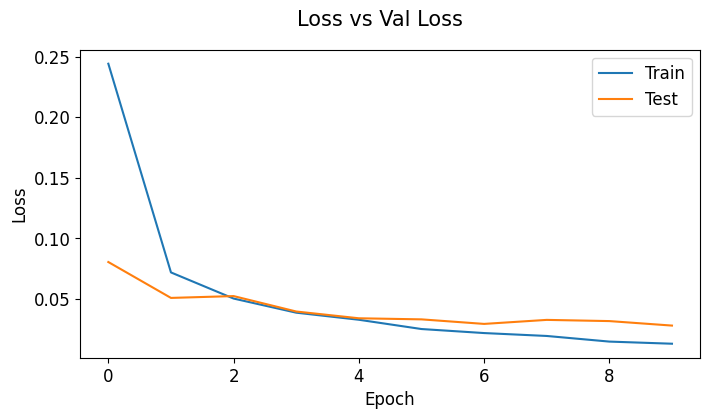

In [24]:
optimization_learning_curves(history_base, metrica='loss', title='Loss vs Val Loss')

- Se presenta un pequeño sobre ajuste después de la época 4, pero se evidencia que es posible que la curva de validación se reduzca después de la época 10

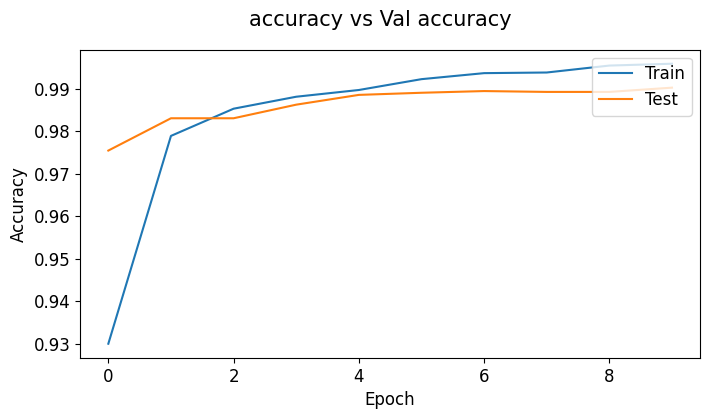

In [26]:
optimization_learning_curves(
    history_base,
    metrica='accuracy',
    title='accuracy vs Val accuracy',
    y_label = 'Accuracy')

El modelo no tiene un buen comportamiento al momento de predecir los datos de validación, con relación a los de entrenamiento, sin embargo, es un score muy alto.

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Performance: %.2f%%" % (100-score[1]*100))

Performance: 0.98%


In [28]:
print('Accuracy :',score[1])
print('Loss :',score[0])

Accuracy : 0.9901999831199646
Loss : 0.027963051572442055


# CNN más profunda

In [ ]:
def model_deep():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(15, (2,2), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
X_train.shape[0]/200

300.0

In [ ]:
model = model_deep()
history_deep = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 3s 6ms/step - loss: 0.4304 - accuracy: 0.8634 - val_loss: 0.1143 - val_accuracy: 0.9661
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.1152 - accuracy: 0.9651 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0813 - accuracy: 0.9748 - val_loss: 0.0478 - val_accuracy: 0.9841
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0335 - val_accuracy: 0.9881
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.0298 - val_accuracy: 0.9897
Epoch 

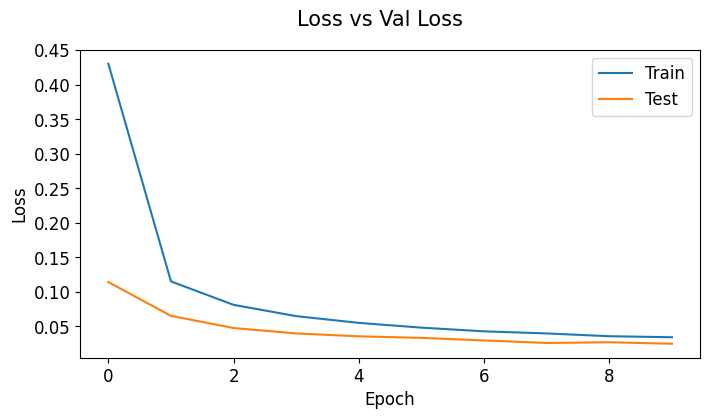

In [ ]:
optimization_learning_curves(history_deep, metrica='loss', title='Loss vs Val Loss')

Se demora en converger, posiblemente sea necesario más épocas.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Performance: %.2f%%" % (100-score[1]*100))

Performance: 0.89%


In [ ]:
print('Accuracy :',score[1])
print('Loss :',score[0])

Accuracy : 0.991100013256073
Loss : 0.02503504790365696
